In [12]:
# essential libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np 
import plotly.express as px
# import kwargs
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import IsolationForest

In [13]:
colum=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
'fractal_dimension_se', 'radius_worst', 'texture_worst',
'perimeter_worst', 'area_worst', 'smoothness_worst',
'compactness_worst', 'concavity_worst', 'concave points_worst',
'symmetry_worst', 'fractal_dimension_worst']
data=pd.read_csv('data.csv',header=None,names=colum)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data=data.drop(columns='id',axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [16]:
data.shape

(569, 31)

In [17]:
# categorical data columns
cate_data=[i for i in data.columns if data[i].dtypes=='object']
# numerical data columns
num_data=[i for i in data.columns if data[i].dtypes=='float64' or data[i].dtypes=='int64']


In [18]:
# finding null values
null_columns=[]
for i in data.columns:
    if data[i].isnull().sum()>0:
        null_columns.append(i)
print(null_columns)

[]


In [19]:
# checking unique value of categorical data columns
for i in cate_data:
    cate_unique={i:data[i].unique().tolist()}
print(cate_unique)

{'diagnosis': ['M', 'B']}


In [20]:
# custome lable encoding 
# M for 1 and B for 0
condition=[data['diagnosis']=='M',data['diagnosis']=='B']
choise=[1,0]
data['diagnosis']=np.select(condition,choise)
data['diagnosis'].unique()

array([1, 0])

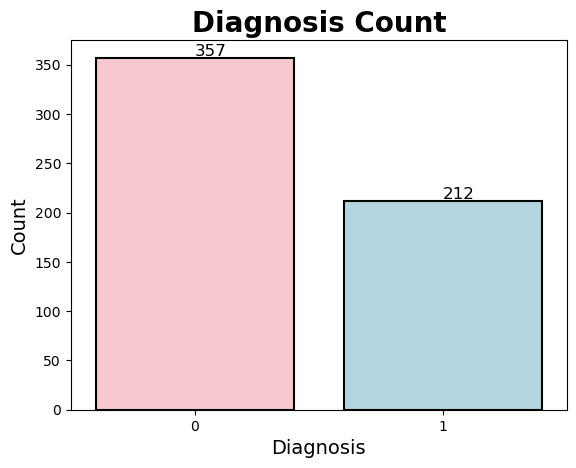

In [21]:
# visuaalise 
plt.Figure(figsize=(10,5))
sns.countplot(x='diagnosis',data=data,palette= ['#FFC0CB', '#ADD8E6'],  
            edgecolor='black', linewidth=1.5)
plt.title('Diagnosis Count', fontsize=20, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax = plt.gca()

for patch in ax.patches:
    plt.text(x=patch.get_x()+0.4, y=patch.get_height()+2, 
    s=str(int(patch.get_height())), fontsize=12)

<Axes: >

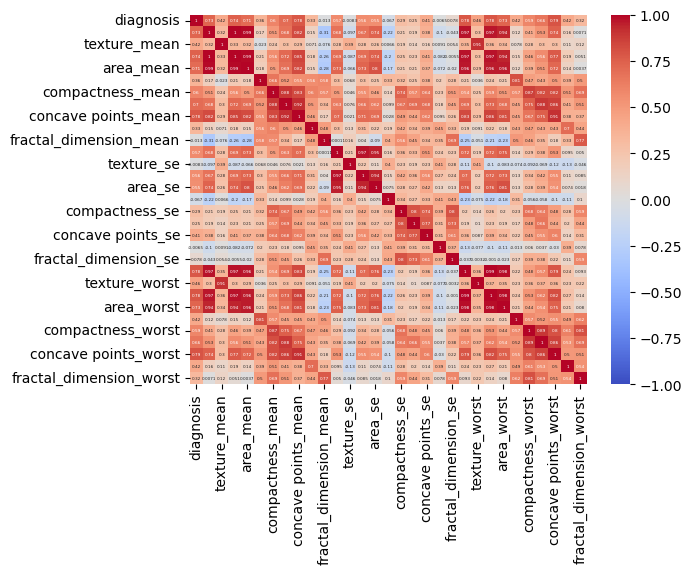

In [22]:
corr_matric=data.corr()

plt.Figure(figsize=(100,100))
sns.heatmap(corr_matric,annot=True,cmap='coolwarm',annot_kws={"fontsize":3},vmax=1,vmin=-1)

c:\Users\avish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\avish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\avish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\avish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

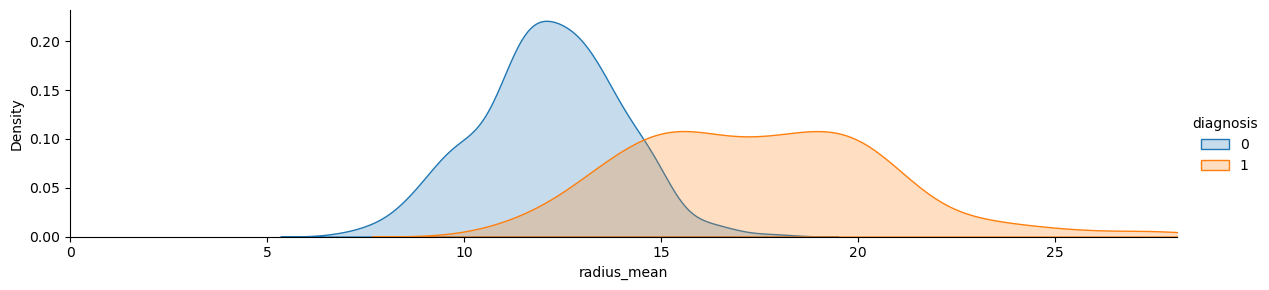

In [23]:
def plot_dis(df,vars,target,**kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df,hue=target,aspect=4,row=row,col=col)#A FacetGrid is a multi-axes grid with subplots visualizing the distribution 
                                                              #of variables of a dataset and the relationship between multiple variables
    facet.map(sns.kdeplot,vars,shade=True)
    facet.set(xlim=(0,df[vars].max()))
    facet.add_legend()
    plt.show()
plot_dis(df=data,vars='radius_mean', target='diagnosis')

c:\Users\avish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


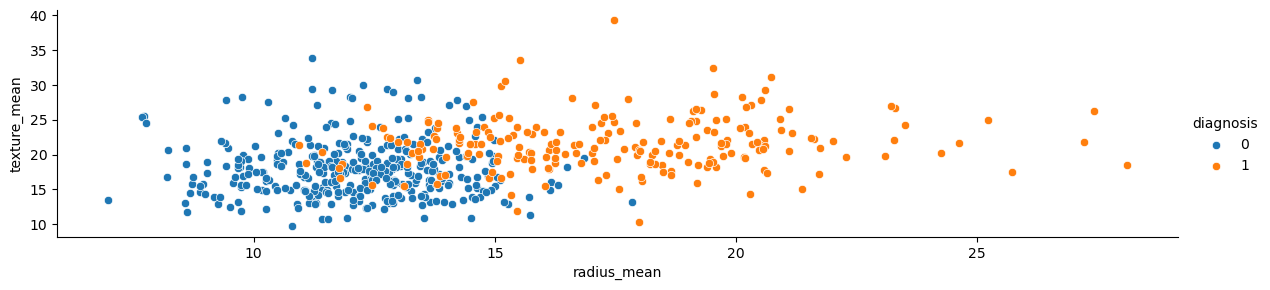

In [24]:
def plot_scatter(df,var_1,var_2,target,**kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df,hue=target,aspect=4,row=row,col=col)
    facet.map(sns.scatterplot,var_1,var_2,alpha=1)
    facet.add_legend()
    plt.show()

plot_scatter(df=data, var_1='radius_mean', var_2='texture_mean', target='diagnosis')

In [25]:
# sactter polt using plotly.express 
def scatter_plot(df,var_1,var_2,target,**kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    fig=px.scatter(df,x=var_1,y=var_2,color=target,facet_row=row,facet_col=col)  
    fig.show()
scatter_plot(df=data, var_1='radius_mean', var_2='texture_mean', target='diagnosis')

In [26]:
# # parallel coordinates plot

data_labels = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
               'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

fig = px.parallel_coordinates(
                              data, 
                              dimensions=data_labels,
                              color='diagnosis',
                              color_continuous_scale=px.colors.sequential.Plasma,
                              labels={'radius_mean':'Radius Mean', 'texture_mean':'Texture Mean', 'perimeter_mean':'Perimeter Mean',
                                      'area_mean':'Area Mean', 'smoothness_mean':'Smoothness Mean', 'compactness_mean':'Compactness Mean'
                                      , 'concavity_mean':'Concavity Mean', 'concave points_mean':'Concave Points Mean',
                                        'symmetry_mean':'Symmetry Mean','fractal_dimension_mean':'Fractal Dimension Mean'},
                              title='Breast Cancer Diagnosis by Mean Characteristics'
                             )
fig.show()





In [27]:
# Model Selection

selector=SelectKBest(score_func=f_classif,k=5)
# split X and y
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']
# fit
selector.fit(X,y)
# getting the indices of the selected features
selected_indices=selector.get_support(indices=True)
# selected Features
selected_features=X.columns[selected_indices].tolist()
print(selected_features)

['perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


In [28]:
# train test split
x=data[selected_features]
y=data['diagnosis']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)




In [29]:
# Model Training

IF=IsolationForest(n_estimators=100,max_samples='auto',contamination='auto',random_state=42)
IF.fit(X_train)

IsolationForest(random_state=42)

In [30]:
# prdicting
y_pred=IF.predict(X_test)


In [31]:
# Convert -1 to 1 and 1 to 0
y_pred=np.where(y_pred==-1,1,0)

In [32]:
# before accuracy checking should convert numbers
accuracy=classification_report(y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.69      0.93      0.80        71
           1       0.74      0.33      0.45        43

    accuracy                           0.70       114
   macro avg       0.72      0.63      0.62       114
weighted avg       0.71      0.70      0.67       114



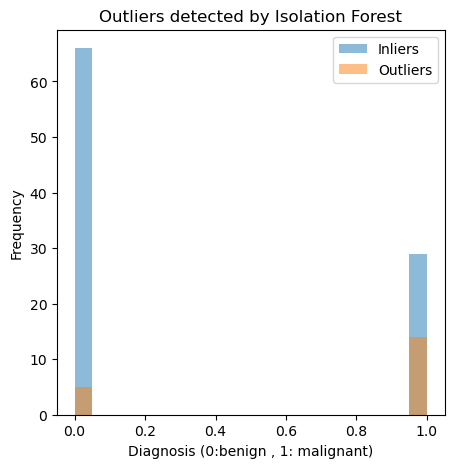

In [33]:
# plot the outliers keep in  red color
plt.figure(figsize=(5,5))
plt.hist(y_test[y_pred==0], bins=20, alpha=0.5, label="Inliers")
plt.hist(y_test[y_pred==1], bins=20, alpha=0.5, label="Outliers")
plt.xlabel("Diagnosis (0:benign , 1: malignant)")
plt.ylabel("Frequency")
plt.title("Outliers detected by Isolation Forest")
plt.legend()
plt.show()

In [34]:
import plotly.graph_objs as go
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
model.fit(X)
# Predicting anomalies
y_pred1 = model.fit_predict(X)


In [35]:
# Creating scatter plot
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=X.iloc[:, 0],
        y=X.iloc[:, 1],
        mode='markers',
        marker=dict(
            color=y_pred1,
            colorscale='viridis'
        ),
        hovertemplate='Feature 1: %{x}<br>Feature 2: %{y}<extra></extra>'
    )
)

fig.update_layout(
    title='Local Outlier Factor Anomaly Detection',
    xaxis_title='Feature 1',
    yaxis_title='Feature 2'
)

# Add legend annotations
normal_points = go.Scatter(x=[], y=[], mode='markers', 
            marker=dict(color='yellow'), showlegend=True, name='Normal')
anomaly_points = go.Scatter(x=[], y=[], 
        mode='markers', marker=dict(color='darkviolet'), showlegend=True, name='Anomaly')
  
for i in range(len(X)):
    if y_pred1[i] == 1:
        normal_points['x'] += (X.iloc[i, 0],)
        normal_points['y'] += (X.iloc[i, 1],)
    else:
        anomaly_points['x'] += (X.iloc[i, 0],)
        anomaly_points['y'] += (X.iloc[i, 1],)

fig.add_trace(normal_points)
fig.add_trace(anomaly_points)

fig.show()